# CRYPTOCURRENCY ANALYSIS: BITCOIN v. ETHEREUM

#### DATASET 1 WEB SCRAPING COINGECKO

In [1]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import sys

#SCRAPE 24HR CRYPTO PRICES FROM COINGECKO
base_url = "https://www.coingecko.com/"
response = requests.get(base_url)
soup = BeautifulSoup(response.content, 'html.parser')
    
HEADERS = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; rv:87.0) Gecko/20100101 Firefox/12.0'   
}

#ITERATE FROM PAGE 1 OF COINGECKO
for i in range(1,2):
    print('Processing page {0}'.format(i))
    params = {
        'page':i
    }

#SCRAPE URL VIA COMMAND LINE

#SCRAPE TABLE FROM COINGECKO 
df = pd.DataFrame(pd.read_html(str(soup))[0])
pd.read_html(str(soup))[0]

#DELETE NULL COLUMNS 
df.drop(df.columns[[0,3]], axis=1, inplace=True)
df = df.drop(['Last 7 Days'], axis=1)

Processing page 1


In [2]:
#HIGHLIGHT CURRENT TOP 100 COINS
df.head(10)

,#,Coin,Price,1h,24h,7d,24h Volume,Mkt Cap
0,1,Bitcoin BTC BTC,"$27,890.58",-0.2%,-12.5%,-29.7%,"$77,520,861,431","$530,974,674,748"
1,2,Ethereum ETH ETH,"$1,905.67",0.4%,-21.6%,-35.2%,"$55,045,721,732","$230,791,710,885"
2,3,Tether USDT USDT,$0.994604,-0.2%,-0.8%,-0.5%,"$172,554,234,614","$82,570,659,233"
3,4,USD Coin USDC USDC,$1.01,-0.3%,1.3%,1.2%,"$26,997,087,703","$49,563,448,284"
4,5,BNB BNB BNB,$252.36,0.5%,-19.6%,-37.3%,"$5,716,359,710","$42,452,059,566"
5,6,XRP XRP XRP,$0.374500,0.9%,-27.3%,-42.2%,"$6,771,713,642","$18,175,477,550"
6,7,Binance USD BUSD BUSD,$1.01,-0.7%,0.4%,1.1%,"$23,874,355,600","$16,987,863,772"
7,8,Cardano ADA ADA,$0.438689,0.4%,-33.0%,-51.0%,"$3,092,027,337","$14,910,239,392"
8,9,Solana SOL SOL,$42.11,-3.7%,-35.9%,-54.6%,"$4,962,952,284","$14,301,201,071"
9,10,Dogecoin DOGE DOGE,$0.075227611915,-1.2%,-30.5%,-44.7%,"$2,858,660,227","$10,041,613,275"


In [3]:
df['Coin'].iloc[0] = 'BTC'
df['Coin'].iloc[1] = 'ETH'
df['Coin'].iloc[2] = 'USDT'
df['Coin'].iloc[3] = 'USDC'
df['Coin'].iloc[4] = 'BNB'
df['Coin'].iloc[5] = 'XRP'
df['Coin'].iloc[6] = 'ADA'
df['Coin'].iloc[7] = 'BUSD'
df['Coin'].iloc[8] = 'SOL'
df['Coin'].iloc[9] = 'DOGE'
df.head(10)

C:\Users\13103\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,#,Coin,Price,1h,24h,7d,24h Volume,Mkt Cap
0,1,BTC,"$27,890.58",-0.2%,-12.5%,-29.7%,"$77,520,861,431","$530,974,674,748"
1,2,ETH,"$1,905.67",0.4%,-21.6%,-35.2%,"$55,045,721,732","$230,791,710,885"
2,3,USDT,$0.994604,-0.2%,-0.8%,-0.5%,"$172,554,234,614","$82,570,659,233"
3,4,USDC,$1.01,-0.3%,1.3%,1.2%,"$26,997,087,703","$49,563,448,284"
4,5,BNB,$252.36,0.5%,-19.6%,-37.3%,"$5,716,359,710","$42,452,059,566"
5,6,XRP,$0.374500,0.9%,-27.3%,-42.2%,"$6,771,713,642","$18,175,477,550"
6,7,ADA,$1.01,-0.7%,0.4%,1.1%,"$23,874,355,600","$16,987,863,772"
7,8,BUSD,$0.438689,0.4%,-33.0%,-51.0%,"$3,092,027,337","$14,910,239,392"
8,9,SOL,$42.11,-3.7%,-35.9%,-54.6%,"$4,962,952,284","$14,301,201,071"
9,10,DOGE,$0.075227611915,-1.2%,-30.5%,-44.7%,"$2,858,660,227","$10,041,613,275"


In [4]:
df['1h'] = df['1h'].str[:-1].astype(float)
# df['1h'] = df['1h'].apply(lambda x: float(x.split()[0].replace('%', '')))

<AxesSubplot:xlabel='Coin'>

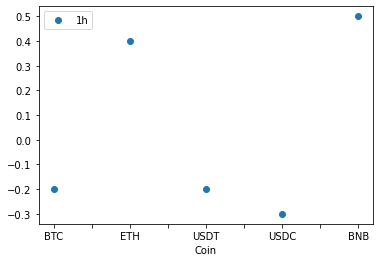

In [5]:
# PLOT 1H DIFFERENCE BETWEEN PRICE PERCENTAGE OF TOP 3 COINS 
# import matplotlib.pyplot as plt
# plt.figure()
# plt.rcParams.update({'font.size': 10}) # must set in top
# df['1h'] = df['1h'].apply(lambda x: float(x.split()[0].replace('%', '')))
df.iloc[0:5].plot(x='Coin', y='1h', style='o')

In [6]:
df['7d'] = df['7d'].str[:-1].astype(float)

<AxesSubplot:xlabel='Coin'>

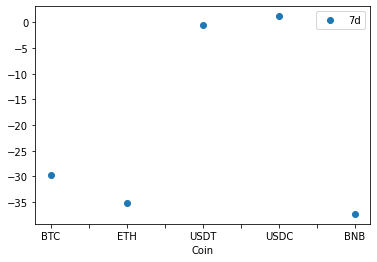

In [7]:
#PLOT 7 Day DIFFERENCE BETWEEN PRICE PERCENTAGE OF TOP 3 COINS 
df.iloc[0:5].plot(x='Coin', y='7d', style='o')

In [8]:
df['24h'] = df['24h'].str[:-1].astype(float)

<AxesSubplot:xlabel='Coin'>

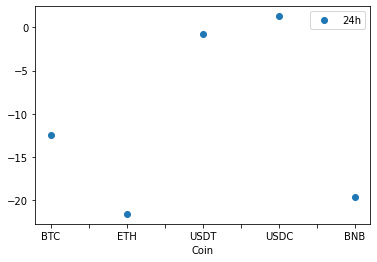

In [9]:
#PLOT 24 HOUR DIFFERENCE BETWEEN PRICE PERCENTAGE OF TOP 3 COINS 
df.iloc[0:5].plot(x='Coin', y='24h', style='o')

In [10]:
#STORE INTO .CSV FILE 
#df.to_csv('C:\\Users\\13103\\Downloads\\COINBASE_DATA.csv')

#### DATASET 2 WEB SCRAPING COIN DESK API

In [11]:
#IMPORT LIBRARIES
import requests
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

#COINS ANALYZED IN SCRAPING
coin_list = ['BTC','ETH']

#DEFINING THE DATAFRAME 
main_df = pd.DataFrame()

for coin in coin_list:
    coin_df = pd.DataFrame()
    df = pd.DataFrame(index=[0])
    
    
    #DEFINING START-DATE AND END-DATE 
    datetime_end = datetime(2021, 7, 2, 0, 0)
    datetime_check = datetime(2021, 7, 1, 0, 0)
    
    while len(df) > 0:
        if datetime_end == datetime_check:
            break
        
        datetime_start = datetime_end - relativedelta(hours = 12)
        
       #API USED FOR SCRAPING 
        url = 'https://production.api.coindesk.com/v2/price/values/'+ coin +'?start_date='+datetime_start.strftime("%Y-%m-%dT%H:%M") + '&end_date=' + datetime_end.strftime("%Y-%m-%dT%H:%M") + '&ohlc=true'
        
        #USING REQUEST TO FETCH DATA FROM API IN THE JSON FORMAT THEN STORE INTO DATAFRAME
        temp_data = requests.get(url).json()
        df = pd.DataFrame(temp_data['data']['entries'])
        #ADD COIN AND ITERATE BELOW 
        df.columns = ['Timestamp', 'Open', 'High', 'Low', 'Price']
        
       #HANDLE MISSING DATA 
        insert_ids_list = [np.nan]
       
        #ITERATE
        while len(insert_ids_list) > 0:
            timestamp_checking = np.array(df['Timestamp'][1:]) - np.array(df['Timestamp'][:-1])
            insert_ids_list = np.where(timestamp_checking!= 60000)[0]
            if len(insert_ids_list) > 0:
                print(str(len(insert_ids_list)) + 'Processing Data')
                insert_ids = insert_ids_list[0]
                temp_df = df.iloc[insert_ids.repeat(int(timestamp_checking[insert_ids]/60000)-1)].reset_index(drop=True)
                temp_df['Timestamp'] = [temp_df['Timestamp'][0] + i*60000 for i in range(1, len(temp_df)+1)]
                df = df.loc[:insert_ids].append(temp_df).append(df.loc[insert_ids+1:]).reset_index(drop=True)
                insert_ids_list = insert_ids_list[1:]
                
        
        #ADDING DATETIME AND SYMBOL TO DATAFRAME
        df = df.drop(['Timestamp'], axis=1)
        df['Datetime'] = [datetime_end - relativedelta(minutes=len(df)-i) for i in range(0, len(df))]
        coin_df = df.append(coin_df)
        datetime_end = datetime_start
        
    coin_df['Coin'] = coin
    main_df = main_df.append(coin_df)

#GENERATE DATAFRAME FOR FIRST FIVE ROWS OF BITCOIN AND ETHER
main_df = main_df[['Datetime', 'Coin', 'Open', 'High', 'Low', 'Price']].reset_index(drop=True)
main_df


    

1Processing Data
1Processing Data


,Datetime,Coin,Open,High,Low,Price
0,2021-07-01 00:00:00,BTC,35049.045484,35056.817222,34991.326658,34993.994267
1,2021-07-01 00:01:00,BTC,34995.349202,35030.583041,34989.167695,34991.266464
2,2021-07-01 00:02:00,BTC,34991.950939,34994.431719,34929.671801,34952.450112
3,2021-07-01 00:03:00,BTC,34954.642324,34980.657519,34954.642324,34961.649826
4,2021-07-01 00:04:00,BTC,34960.350436,34996.245435,34960.350436,34976.586395
...,...,...,...,...,...,...
2875,2021-07-01 23:55:00,ETH,2115.487870,2116.022408,2115.060438,2115.626989
2876,2021-07-01 23:56:00,ETH,2115.634570,2115.634570,2110.692884,2110.885244
2877,2021-07-01 23:57:00,ETH,2111.087472,2111.089436,2108.026641,2109.508642
2878,2021-07-01 23:58:00,ETH,2109.780003,2113.666995,2109.780003,2113.329023


In [12]:
#STORE INTO .CSV FILE
#main_df.to_csv('C:\\Users\\13103\\Downloads\\CoinDesk_Dataset.csv',header=False)

In [85]:
main_df.corrwith('Price')

AttributeError: 'str' object has no attribute '_get_numeric_data'

<AxesSubplot:title={'center':'Bitcoin price over 1 day'}>

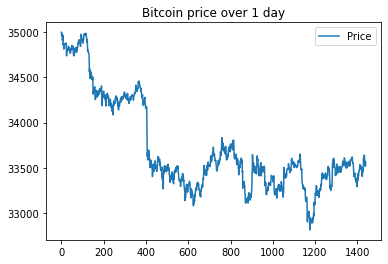

In [13]:
#PLOT 24 HOUR BITCOIN PRICE
main_df_BTC = main_df[['Coin','Price']]
rslt_df_BTC = main_df_BTC[main_df_BTC['Coin'] == 'BTC']
rslt_df_BTC[['Price']].plot(title='Bitcoin price over 1 day')

<AxesSubplot:title={'center':'Ethereum price over 1 day'}>

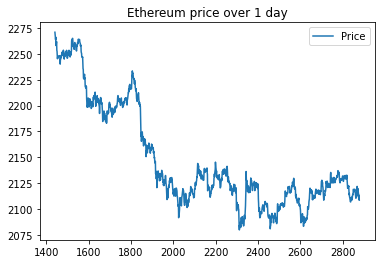

In [14]:
#PLOT 24 HOUR ETHEREUM PRICE
main_df_ETH = main_df[['Coin','Price']]
rslt_df_ETH = main_df_ETH[main_df_ETH['Coin'] == 'ETH']
rslt_df_ETH[['Price']].plot(title='Ethereum price over 1 day')

In [87]:
#(main_df['Open'].corr(main_df['Price']))
main_df_ETH = main_df[['Coin','Price']]
rslt_df_ETH = main_df_ETH[main_df_ETH['Coin'] == 'ETH']

main_df_BTC = main_df[['Coin','Price']]
rslt_df_BTC = main_df_BTC[main_df_BTC['Coin'] == 'BTC']

rslt_df_ETH.rename(columns = {'Price':'ETH Price'}, inplace = True)
rslt_df_BTC.rename(columns = {'Price':'BTC Price'}, inplace = True)

#rslt_df_ETH['Price':'ETH Price'].corr(rslt_df_BTC['Price':'BTC Price'])

C:\Users\13103\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [16]:
#BITCOIN PRICE 00:00 = 34993.99
main_df.iloc[0]

Datetime    2021-07-01 00:00:00
Coin                        BTC
Open               35049.045484
High               35056.817222
Low                34991.326658
Price              34993.994267
Name: 0, dtype: object

In [17]:
#BITCOIN CLOSE PRICE = 33528.57
main_df.iloc[1439]

Datetime    2021-07-01 23:59:00
Coin                        BTC
Open               33566.759399
High               33566.759399
Low                33516.926378
Price              33528.566795
Name: 1439, dtype: object

In [18]:
#ETHEREUM PRICE 00:00 = 2271.04
main_df.iloc[1440]

Datetime    2021-07-01 00:00:00
Coin                        ETH
Open                2275.689004
High                2276.012712
Low                 2270.817381
Price                2271.03933
Name: 1440, dtype: object

In [19]:
#ETHEREUM CLOSE PRICE = 2108.45
main_df.iloc[2879]

Datetime    2021-07-01 23:59:00
Coin                        ETH
Open                2113.209766
High                2113.209766
Low                 2108.454955
Price               2108.454955
Name: 2879, dtype: object

#### DATASET 3 VOLATILITY INDEX CSV

In [20]:
#VOLATILITY INDEX MEASURES THE PRICE VARIATIONS OF A FINANCIAL INSTRUMENT OVER A SPECIFIED PERIOD OF TIME 

In [86]:
#FIND ALL ROWS DATING FROM 07/2021-05/2022
#How much has volatility changed from 07/2021-05/2022
df = pd.read_csv ('ethervol.csv',usecols=
['Date','Ethereum Volatility Index'])
print(df)

                    Date  Ethereum Volatility Index
0    2020-04-15 00:00:00                     105.48
1    2020-04-16 00:00:00                     103.27
2    2020-04-17 00:00:00                     102.55
3    2020-04-18 00:00:00                      99.87
4    2020-04-19 00:00:00                     101.69
..                   ...                        ...
740  2022-05-06 00:00:00                      69.80
741  2022-05-07 00:00:00                      67.93
742  2022-05-08 00:00:00                      73.01
743  2022-05-09 00:00:00                      82.85
744  2022-05-10 00:00:00                      81.75

[745 rows x 2 columns]


In [22]:
#FIND ALL ROWS DATING FROM 07/2021-05/2022
#FIGURE OUT HOW TO SAVE THIS NEW DATA TO CSV
print(df.iloc[431:745])

                    Date  Ethereum Volatility Index
431  2021-07-01 00:00:00                     116.93
432  2021-07-02 00:00:00                     108.97
433  2021-07-03 00:00:00                     107.09
434  2021-07-04 00:00:00                     103.48
435  2021-07-05 00:00:00                     102.80
..                   ...                        ...
740  2022-05-06 00:00:00                      69.80
741  2022-05-07 00:00:00                      67.93
742  2022-05-08 00:00:00                      73.01
743  2022-05-09 00:00:00                      82.85
744  2022-05-10 00:00:00                      81.75

[314 rows x 2 columns]


In [23]:
# PLOTTING VOLATILITY ON 10 DAY PERIOD LEADING TO 24 HOUR ANALYSIS FROM 2021 API 
df['Date'].iloc[424] = '6/22'
df['Date'].iloc[425] = '6/23'
df['Date'].iloc[426] = '6/24'
df['Date'].iloc[427] = '6/25'
df['Date'].iloc[428] = '6/26'
df['Date'].iloc[429] = '6/27'
df['Date'].iloc[430] = '6/28'
df['Date'].iloc[431] = '6/29'
df['Date'].iloc[432] = '6/30'
df['Date'].iloc[433] = '7/1'
df['Date'].iloc[434] = '7/2'

C:\Users\13103\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='Date'>

<Figure size 432x288 with 0 Axes>

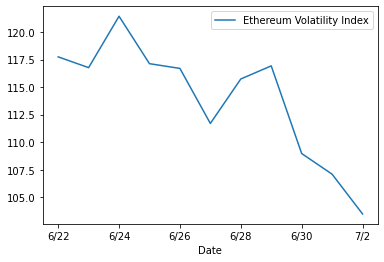

In [24]:
import matplotlib.pyplot as plt
plt.figure()
plt.rcParams.update({'font.size': 10})
df.iloc[424:435].plot(x = 'Date')

In [25]:
#PLOTTING VOLATILITY ON 10 DAY PERIOD LEADING TO 24 HOUR ANALYSIS FROM 2022 WEBSCRAPED DATA 
df['Date'].iloc[734] = '4/28'
df['Date'].iloc[735] = '4/29'
df['Date'].iloc[736] = '4/30'
df['Date'].iloc[737] = '5/1'
df['Date'].iloc[738] = '5/2'
df['Date'].iloc[739] = '5/3'
df['Date'].iloc[740] = '5/4'
df['Date'].iloc[741] = '5/5'
df['Date'].iloc[742] = '5/6'
df['Date'].iloc[743] = '5/7'
df['Date'].iloc[744] = '5/8'

C:\Users\13103\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='Date'>

<Figure size 432x288 with 0 Axes>

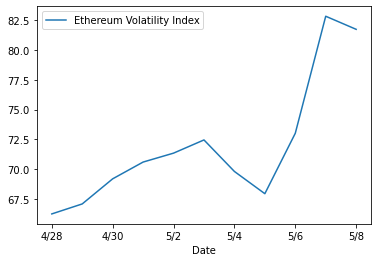

In [26]:
import matplotlib.pyplot as plt
plt.figure()
plt.rcParams.update({'font.size': 10})
df.iloc[734:750].plot(x = 'Date')

In [82]:
#VOLATILITY INDEX FOR 2021
print(df.iloc[434])

Date                            7/2
Ethereum Volatility Index    103.48
Name: 434, dtype: object


In [28]:
#VOLATILITY INDEX FOR 2022
print(df.iloc[744])

Date                           5/8
Ethereum Volatility Index    81.75
Name: 744, dtype: object
